<a href="https://colab.research.google.com/github/lenient7/org-recur/blob/master/james_rsm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


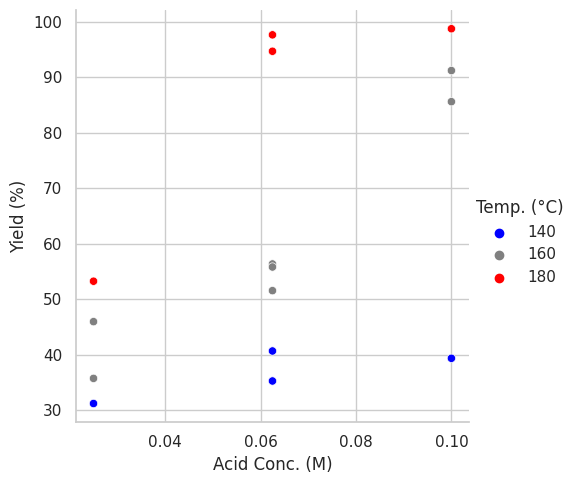

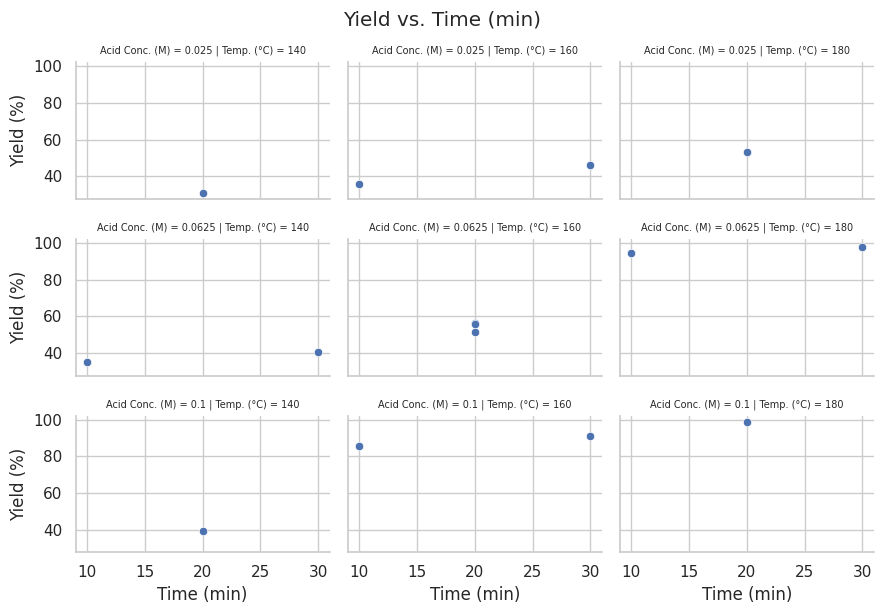

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Create a boxplot using Seaborn
sns.set(style="whitegrid")

custom_palette = ['blue', 'gray', 'red']  # Custom list of colors

# Specify the data and column for the boxplot
sns.relplot(x="Acid Conc. (M)", y="Yield (%)", palette=custom_palette, hue="Temp. (°C)", data=df,)

# Show the plot
plt.show()

# Create a 9x9 array of plots for Yield versus Time (min)
grid = sns.relplot(x='Time (min)', y='Yield (%)', data=df, kind='scatter', col='Temp. (°C)', row='Acid Conc. (M)', height=2, aspect=1.5)

# Set the title for the whole grid
grid.fig.suptitle('Yield vs. Time (min)', y=1.02)

# Change the fontsize of the subplot titles individually
for ax in grid.axes.flat:
    ax.set_title(ax.get_title(), fontsize='7')

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import plotly.express as px


# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Create a 3D scatter plot
fig = px.scatter_3d(
    df,
    x='Time (min)',
    y='Acid Conc. (M)',
    z='Yield (%)',
    color='Temp. (°C)',  # Color by category
    # size='z',          # Size by 'z' values
    # symbol='Temp. (°C)',  # Use different symbols for each category
    title='Customized 3D Scatter Plot'
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Now, 'df' is your DataFrame containing the data from the CSV file
# You can perform various operations on 'df' such as data analysis, manipulation, etc.

# To display the first few rows of the DataFrame
print(df)

    Temp. (°C)  Acid Conc. (M)  Time (min)   Sample  Internal Standard  \
0          180          0.1000          20   CELF_1               0.40   
1          180          0.0625          30   CELF_2               0.40   
2          180          0.0625          10   CELF_3               0.39   
3          180          0.0250          20   CELF_4               0.40   
4          160          0.1000          30   CELF_5               0.40   
5          160          0.1000          10   CELF_6               0.40   
6          160          0.0625          20   CELF_7               0.39   
7          160          0.0250          30   CELF_8               0.40   
8          160          0.0250          10   CELF_9               0.40   
9          140          0.0625          30  CELF_10               0.40   
10         140          0.1000          20  CELF_11               0.39   
11         140          0.0625          10  CELF_12               0.40   
12         140          0.0250        

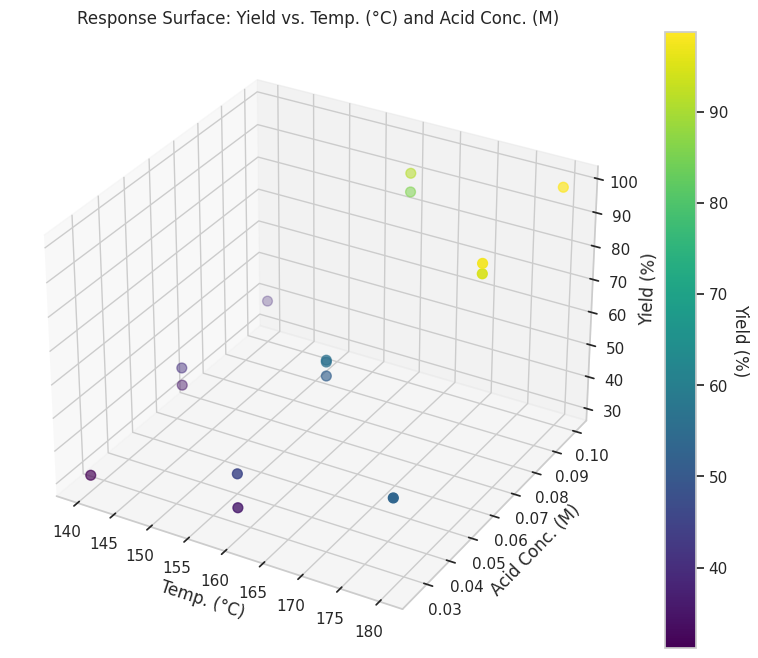

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Use the provided DataFrame
# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Set the Seaborn style
sns.set(style="whitegrid")

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing Yield (%)
scatter = ax.scatter(df['Temp. (°C)'], df['Acid Conc. (M)'], df['Yield (%)'], c=df['Yield (%)'], cmap='viridis', s=50)

# Set axis labels
ax.set_xlabel('Temp. (°C)')
ax.set_ylabel('Acid Conc. (M)')
ax.set_zlabel('Yield (%)')

# Add a colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Yield (%)', rotation=270, labelpad=15)

# Set the title
plt.title('Response Surface: Yield vs. Temp. (°C) and Acid Conc. (M)')

# Show the plot
plt.show()

Mean Squared Error (Training): 9.29
Mean Squared Error (Testing): 993.08


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



AttributeError: ignored

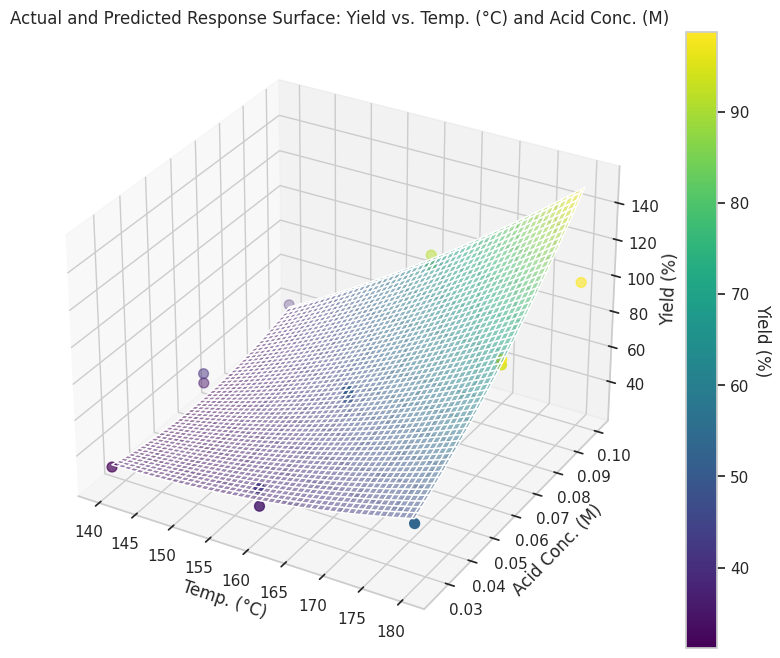

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Temp. (°C)', 'Acid Conc. (M)']]
y = df['Yield (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features (degree=2)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_poly_train)

# Predictions on the testing set
y_test_pred = model.predict(X_poly_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error (Training): {mse_train:.2f}')
print(f'Mean Squared Error (Testing): {mse_test:.2f}')

# Create a response surface plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing actual Yield (%)
scatter_actual = ax.scatter(df['Temp. (°C)'], df['Acid Conc. (M)'], df['Yield (%)'], c=df['Yield (%)'], cmap='viridis', s=50, label='Actual Yield (%)')

# Generate a grid of values for prediction
temp_range = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_range = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
temp_grid, acid_grid = np.meshgrid(temp_range, acid_range)
grid_points = np.c_[temp_grid.ravel(), acid_grid.ravel()]

# Predictions on the grid
grid_poly = poly.transform(grid_points)
predicted_yield = model.predict(grid_poly)
predicted_yield = predicted_yield.reshape(temp_grid.shape)

# Plot the predicted surface
surf = ax.plot_surface(temp_grid, acid_grid, predicted_yield, cmap='viridis', alpha=0.5, label='Predicted Yield Surface')

# Set axis labels
ax.set_xlabel('Temp. (°C)')
ax.set_ylabel('Acid Conc. (M)')
ax.set_zlabel('Yield (%)')

# Add a colorbar
cbar = plt.colorbar(scatter_actual)
cbar.set_label('Yield (%)', rotation=270, labelpad=15)

# Set the title
plt.title('Actual and Predicted Response Surface: Yield vs. Temp. (°C) and Acid Conc. (M)')

# Add a legend
ax.legend()

# Show the plot
plt.show()

Mean Squared Error (Training): 1.16
Mean Squared Error (Testing): 590.17


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



TypeError: ignored

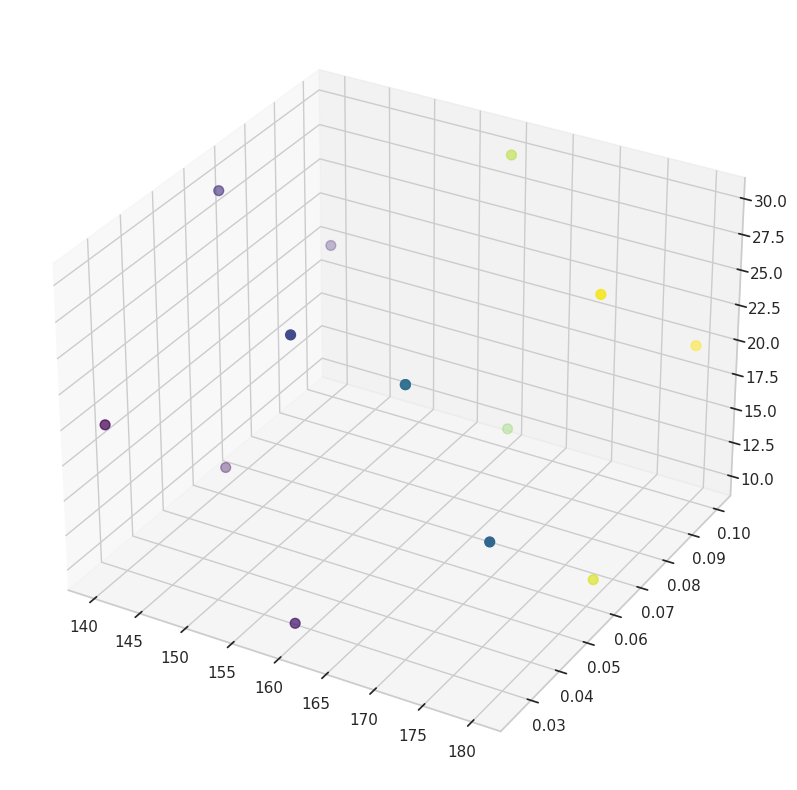

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Temp. (°C)', 'Acid Conc. (M)', 'Time (min)']]
y = df['Yield (%)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Polynomial features (degree=2 for second-order polynomial)
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly_train, y_train)

# Predictions on the training set
y_train_pred = model.predict(X_poly_train)

# Predictions on the testing set
y_test_pred = model.predict(X_poly_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f'Mean Squared Error (Training): {mse_train:.2f}')
print(f'Mean Squared Error (Testing): {mse_test:.2f}')

# Create a 3D response surface plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with color representing actual Yield (%)
scatter_actual = ax.scatter(df['Temp. (°C)'], df['Acid Conc. (M)'], df['Time (min)'], c=df['Yield (%)'], cmap='viridis', s=50, label='Actual Yield (%)')

# Generate a grid of values for prediction
temp_range = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_range = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
time_range = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
temp_grid, acid_grid, time_grid = np.meshgrid(temp_range, acid_range, time_range)

# Predictions on the grid
grid_points = np.c_[temp_grid.ravel(), acid_grid.ravel(), time_grid.ravel()]
grid_poly = poly.transform(grid_points)
predicted_yield = model.predict(grid_poly)

# Reshape the predicted values to a 2D array
predicted_yield = predicted_yield.reshape(temp_grid.shape)

# Plot the predicted surface
surf = ax.plot_surface(temp_grid, acid_grid, time_grid, predicted_yield, cmap='viridis', alpha=0.5, label='Predicted Yield Surface')

# Set axis labels
ax.set_xlabel('Temp. (°C)')
ax.set_ylabel('Acid Conc. (M)')
ax.set_zlabel('Time (min)')
ax.set_title('Actual and Predicted Response Surface: Yield vs. Temp. (°C), Acid Conc. (M), and Time (min)')

# Add a colorbar
cbar = plt.colorbar(scatter_actual)
cbar.set_label('Yield (%)', rotation=270, labelpad=15)

# Add a legend
ax.legend()

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



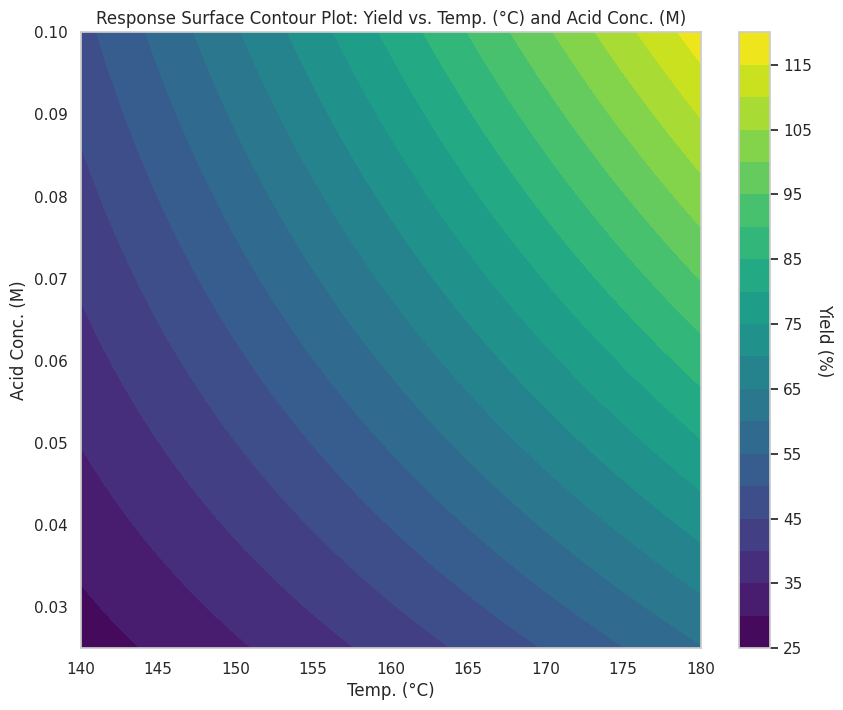

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Temp. (°C)', 'Acid Conc. (M)', 'Time (min)']]
y = df['Yield (%)']

# Polynomial features (degree=2 for second-order polynomial)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate a grid of values for prediction
temp_range = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_range = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
time_range = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
temp_grid, acid_grid, time_grid = np.meshgrid(temp_range, acid_range, time_range)

# Predictions on the grid
grid_points = np.c_[temp_grid.ravel(), acid_grid.ravel(), time_grid.ravel()]
grid_poly = poly.transform(grid_points)
predicted_yield = model.predict(grid_poly)

# Reshape the predicted values to a 2D array
predicted_yield = predicted_yield.reshape(temp_grid.shape)

# Create a contour plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(temp_grid[:, :, 0], acid_grid[:, 0, :], predicted_yield[:, :, 0], cmap='viridis', levels=20)
cbar = plt.colorbar(contour)
cbar.set_label('Yield (%)', rotation=270, labelpad=15)

# Set axis labels and title
ax.set_xlabel('Temp. (°C)')
ax.set_ylabel('Acid Conc. (M)')
ax.set_title('Response Surface Contour Plot: Yield vs. Temp. (°C) and Acid Conc. (M)')

# Show the plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



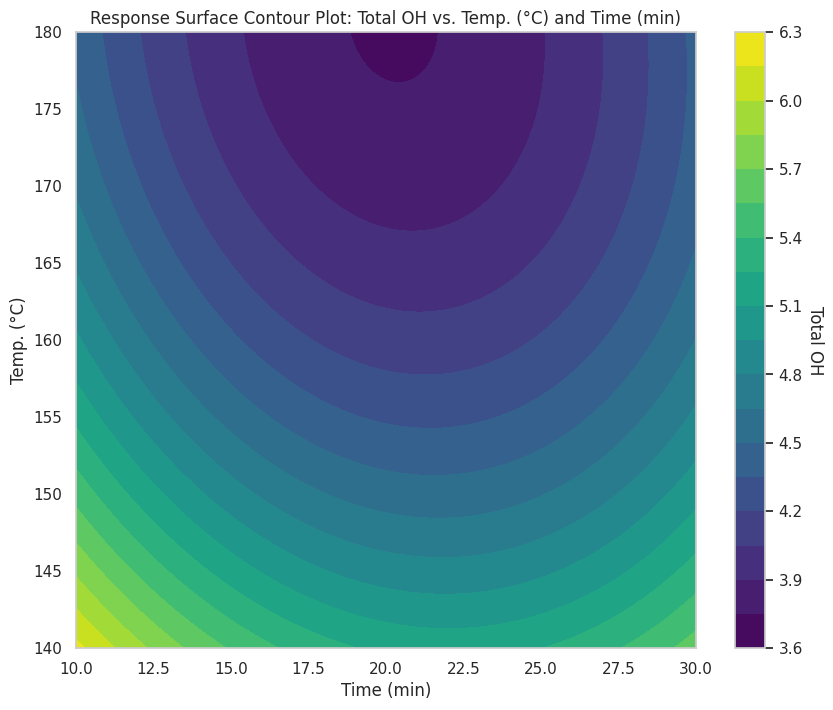

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Temp. (°C)', 'Time (min)']]
y = df['Total OH']

# Polynomial features (degree=2 for second-order polynomial)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate a grid of values for prediction
temp_range = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
time_range = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
temp_grid, time_grid = np.meshgrid(temp_range, time_range)

# Predictions on the grid
grid_points = np.c_[temp_grid.ravel(), time_grid.ravel()]
grid_poly = poly.transform(grid_points)
predicted_total_oh = model.predict(grid_poly)

# Reshape the predicted values to a 2D array
predicted_total_oh = predicted_total_oh.reshape(temp_grid.shape)

# Create a contour plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(time_grid, temp_grid, predicted_total_oh, cmap='viridis', levels=20)
cbar = plt.colorbar(contour)
cbar.set_label('Total OH', rotation=270, labelpad=15)

# Set axis labels and title
ax.set_xlabel('Time (min)')
ax.set_ylabel('Temp. (°C)')
ax.set_title('Response Surface Contour Plot: Total OH vs. Temp. (°C) and Time (min)')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



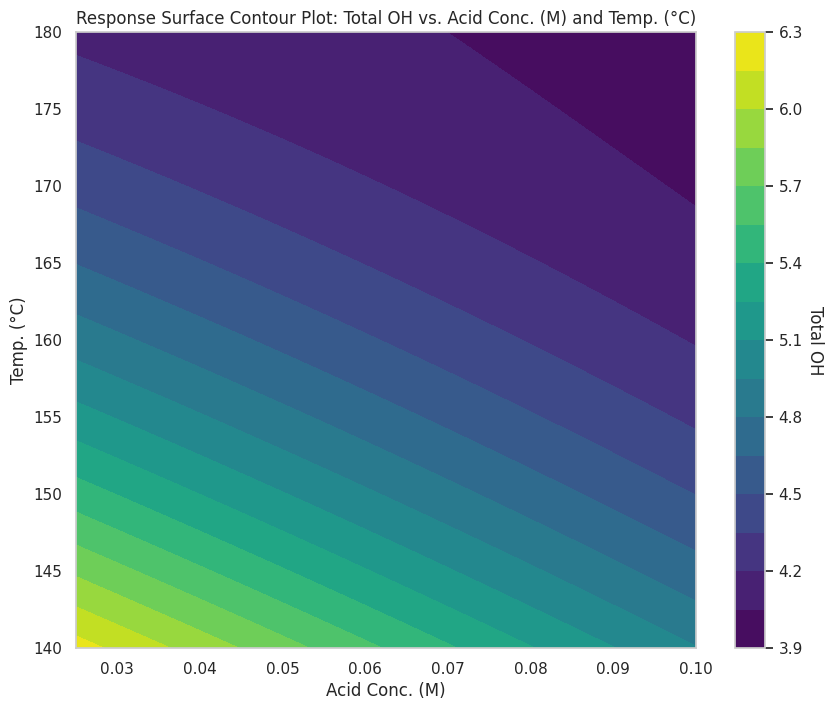

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Acid Conc. (M)', 'Temp. (°C)']]
y = df['Total OH']

# Polynomial features (degree=2 for second-order polynomial)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Generate a grid of values for prediction
acid_range = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
temp_range = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_grid, temp_grid = np.meshgrid(acid_range, temp_range)

# Predictions on the grid
grid_points = np.c_[acid_grid.ravel(), temp_grid.ravel()]
grid_poly = poly.transform(grid_points)
predicted_total_oh = model.predict(grid_poly)

# Reshape the predicted values to a 2D array
predicted_total_oh = predicted_total_oh.reshape(acid_grid.shape)

# Create a contour plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(acid_grid, temp_grid, predicted_total_oh, cmap='viridis', levels=20)
cbar = plt.colorbar(contour)
cbar.set_label('Total OH', rotation=270, labelpad=15)

# Set axis labels and title
ax.set_xlabel('Acid Conc. (M)')
ax.set_ylabel('Temp. (°C)')
ax.set_title('Response Surface Contour Plot: Total OH vs. Acid Conc. (M) and Temp. (°C)')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Temp. (°C)', 'Acid Conc. (M)', 'Time (min)']]
y = df['Yield (%)']

# Polynomial features (degree=2 for second-order polynomial)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

# Get the polynomial coefficients
polynomial_coefficients = model.coef_

print("Polynomial Coefficients:")
print(polynomial_coefficients)

# Get the R-squared value
r_squared = model.score(X_poly, y)

print("R-squared value:", r_squared)


Polynomial Coefficients:
[ 0.00000000e+00 -8.84958333e-01 -1.37432963e+03 -3.31420833e+00
  4.38958333e-03  1.24566667e+01 -3.06250000e-03 -4.88296296e+02
 -3.08000000e+00  1.07483333e-01]
R-squared value: 0.9564068756813144


Coefficients for the polynomial fit:
Coefficient for 1st order term (constant): 12.05
Coefficient for Acid Conc. (M): -1362.44
Coefficient for Temp. (°C): -0.28
Coefficient for (Acid Conc.)^2: -1076.24
Coefficient for (Acid Conc.) * Temp.: 12.46
Coefficient for (Temp.)^2: 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


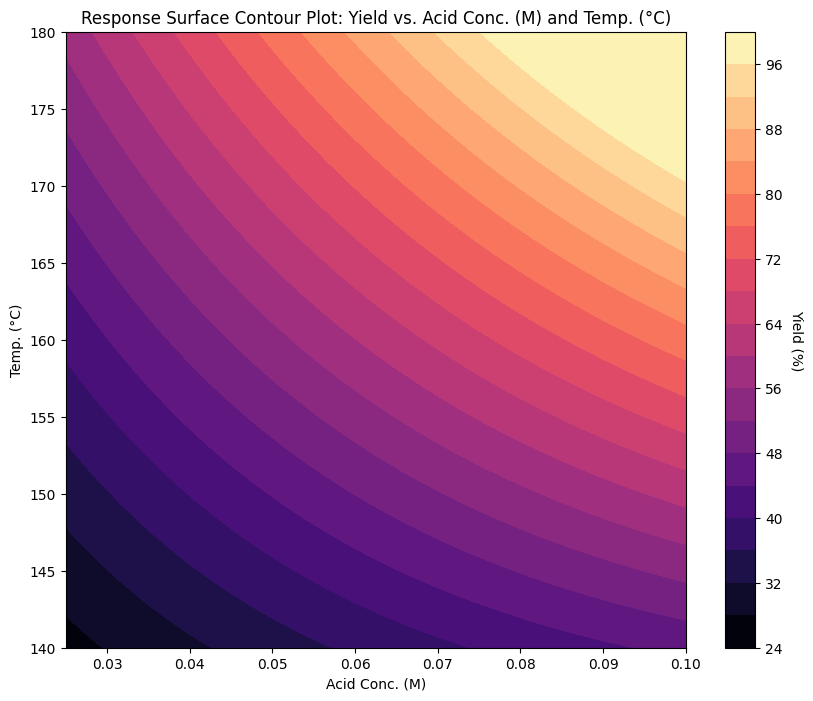

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Selecting relevant columns for the regression model
X = df[['Acid Conc. (M)', 'Temp. (°C)']]
y = df['Yield (%)']

# Polynomial features (degree=2 for second-order polynomial)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_poly, y)

coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients
print("Coefficients for the polynomial fit:")
print(f"Coefficient for 1st order term (constant): {intercept:.2f}")
print(f"Coefficient for Acid Conc. (M): {coefficients[1]:.2f}")
print(f"Coefficient for Temp. (°C): {coefficients[2]:.2f}")
print(f"Coefficient for (Acid Conc.)^2: {coefficients[3]:.2f}")
print(f"Coefficient for (Acid Conc.) * Temp.: {coefficients[4]:.2f}")
print(f"Coefficient for (Temp.)^2: {coefficients[5]:.2f}")

# Generate a grid of values for prediction
acid_range = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
temp_range = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_grid, temp_grid = np.meshgrid(acid_range, temp_range)

# Predictions on the grid
grid_points = np.c_[acid_grid.ravel(), temp_grid.ravel()]
grid_poly = poly.transform(grid_points)
predicted_yield = model.predict(grid_poly)

# Cap the predicted yield at 100%
predicted_yield = np.minimum(predicted_yield, 100)

# Reshape the predicted values to a 2D array
predicted_yield = predicted_yield.reshape(acid_grid.shape)



# Create a contour plot
fig, ax = plt.subplots(figsize=(10, 8))
contour = ax.contourf(acid_grid, temp_grid, predicted_yield, cmap='magma', levels=20)
cbar = plt.colorbar(contour)
cbar.set_label('Yield (%)', rotation=270, labelpad=15)

# Set axis labels and title
ax.set_xlabel('Acid Conc. (M)')
ax.set_ylabel('Temp. (°C)')
ax.set_title('Response Surface Contour Plot: Yield vs. Acid Conc. (M) and Temp. (°C)')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:              Yield (%)   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     36.58
Date:                Wed, 13 Dec 2023   Prob (F-statistic):           7.83e-06
Time:                        16:15:07   Log-Likelihood:                -54.499
No. Observations:                  15   AIC:                             115.0
Df Residuals:                      12   BIC:                             117.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Temp. (°C)         1.2370      0.181      6.

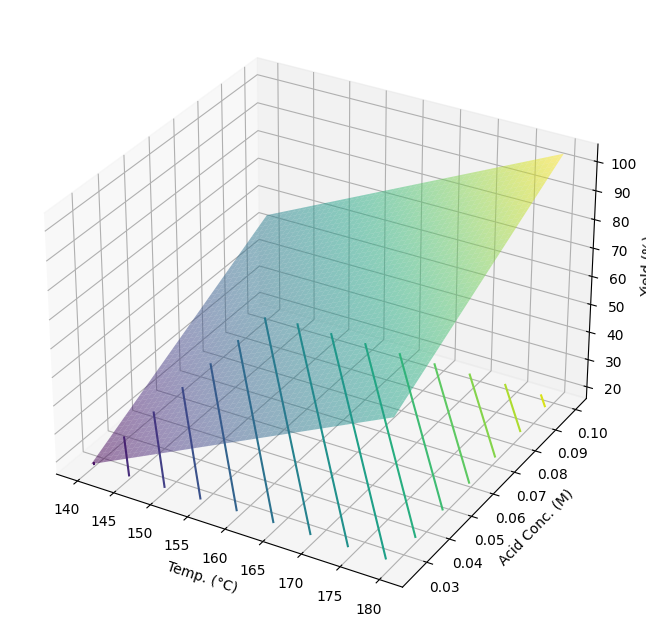

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Temp and Acid Conc.)
X = df[['Temp. (°C)', 'Acid Conc. (M)', 'Intercept']]

# Specify the response variable (Yield)
y = df['Yield (%)']

# Fit the Box-Behnken design
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Generate a grid of values for Temp and Acid Conc.
temp_values = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_values = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
temp_grid, acid_grid = np.meshgrid(temp_values, acid_values)

# Create a design matrix for the grid
grid_df = pd.DataFrame({
    'Temp. (°C)': temp_grid.flatten(),
    'Acid Conc. (M)': acid_grid.flatten(),
    'Intercept': 1
})

# Predict yield for the grid
predicted_yield = results.predict(grid_df)

# Reshape the predicted values to match the grid shape
predicted_yield_grid = predicted_yield.values.reshape(temp_grid.shape)

# Create a contour plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(temp_grid, acid_grid, predicted_yield_grid, cmap='viridis', alpha=0.5)
ax.contour(temp_grid, acid_grid, predicted_yield_grid, levels=15, cmap='viridis', linestyles="solid", offset=predicted_yield_grid.min())

# Set axis labels
ax.set_xlabel('Temp. (°C)')
ax.set_ylabel('Acid Conc. (M)')
ax.set_zlabel('Yield (%)')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


                            OLS Regression Results                            
Dep. Variable:               Total OH   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     5.177
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0239
Time:                        16:18:31   Log-Likelihood:                -13.536
No. Observations:                  15   AIC:                             33.07
Df Residuals:                      12   BIC:                             35.20
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp. (°C)    -0.0371      0.012     -3.143      0.0

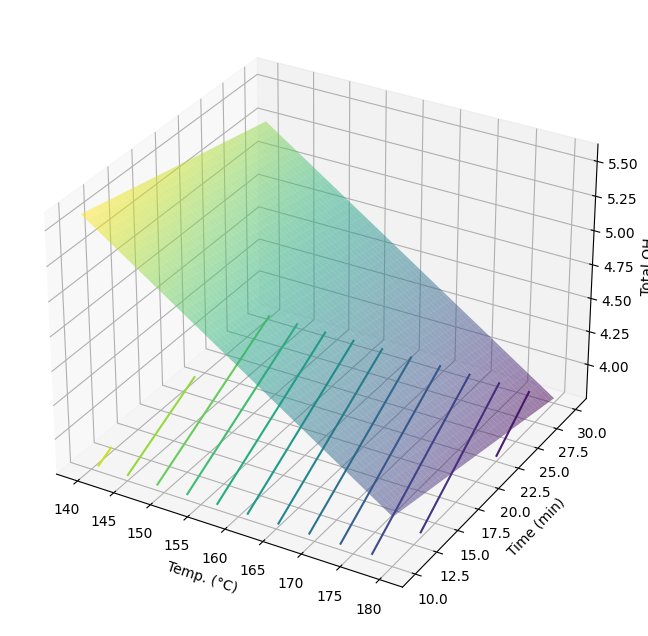

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Temp and Time)
X = df[['Temp. (°C)', 'Time (min)', 'Intercept']]

# Specify the response variable (Total OH)
y = df['Total OH']

# Fit the Box-Behnken design
model = sm.OLS(y, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Generate a grid of values for Temp and Time
temp_values = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
time_values = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
temp_grid, time_grid = np.meshgrid(temp_values, time_values)

# Create a design matrix for the grid
grid_df = pd.DataFrame({
    'Temp. (°C)': temp_grid.flatten(),
    'Time (min)': time_grid.flatten(),
    'Intercept': 1
})

# Predict Total OH for the grid
predicted_total_oh = results.predict(grid_df)

# Reshape the predicted values to match the grid shape
predicted_total_oh_grid = predicted_total_oh.values.reshape(temp_grid.shape)

# Create a contour plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(temp_grid, time_grid, predicted_total_oh_grid, cmap='viridis', alpha=0.5)
ax.contour(temp_grid, time_grid, predicted_total_oh_grid, levels=15, cmap='viridis', linestyles="solid", offset=predicted_total_oh_grid.min())

# Set axis labels
ax.set_xlabel('Temp. (°C)')
ax.set_ylabel('Time (min)')
ax.set_zlabel('Total OH')

# Show the plot
plt.show()


Fitted Parameters: [-0.0370625  -0.01625    10.93633333]


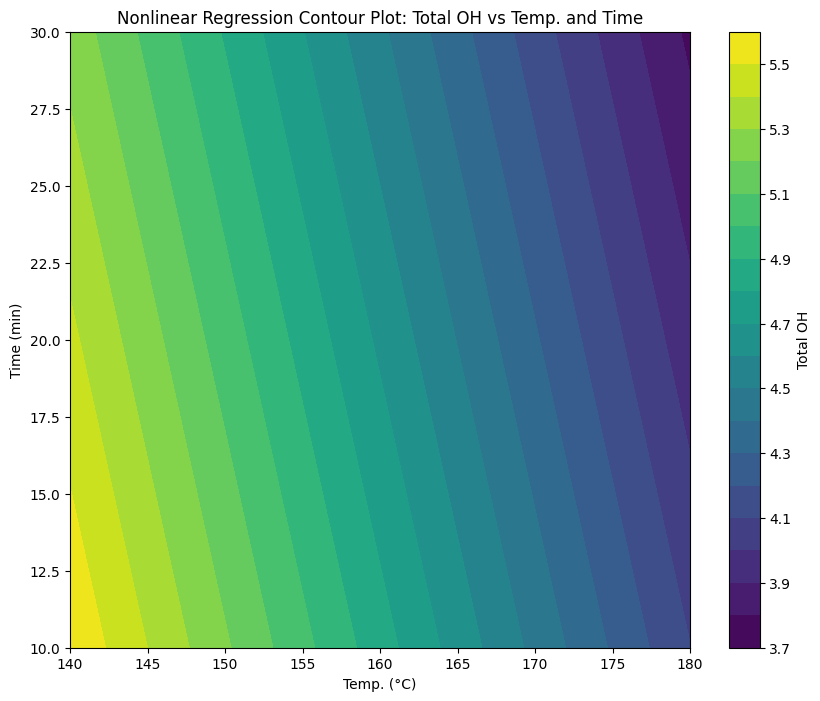

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Define the nonlinear model (quadratic in this case)
def quadratic_model(x, a, b, c):
    return a * x[0] + b * x[1] + c

# Specify the independent variables (Temp and Time)
X = df[['Temp. (°C)', 'Time (min)']].values.T

# Specify the response variable (Total OH)
y = df['Total OH'].values

# Fit the nonlinear model
params, covariance = curve_fit(quadratic_model, X, y)

# Print the fitted parameters
print('Fitted Parameters:', params)

# Generate a grid of values for Temp and Time
temp_values = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
time_values = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
temp_grid, time_grid = np.meshgrid(temp_values, time_values)
grid_values = np.vstack((temp_grid.flatten(), time_grid.flatten()))

# Predict Total OH for the grid using the fitted parameters
predicted_total_oh = quadratic_model(grid_values, *params)

# Reshape the predicted values to match the grid shape
predicted_total_oh_grid = predicted_total_oh.reshape(temp_grid.shape)

# Create a contour plot
plt.figure(figsize=(10, 8))
plt.contourf(temp_grid, time_grid, predicted_total_oh_grid, levels=20, cmap='viridis')
plt.colorbar(label='Total OH')
plt.xlabel('Temp. (°C)')
plt.ylabel('Time (min)')
plt.title('Nonlinear Regression Contour Plot: Total OH vs Temp. and Time')
plt.show()


Fitted Parameters: [ 3.78419219e+01 -3.33254800e-01 -3.93096093e-01  8.86538456e-04
  6.92115354e-03  6.24999701e-04]


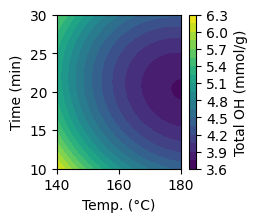

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Temp and Time)
X = df[['Temp. (°C)', 'Time (min)', 'Intercept']].values

# Specify the response variable (Total OH)
y = df['Total OH'].values

# Define a second-order polynomial model
def second_order_polynomial(x, a, b, c, d, e, f):
    return a + b*x[0] + c*x[1] + d*x[0]**2 + e*x[1]**2 + f*x[0]*x[1]

# Fit the second-order polynomial model
params, covariance = curve_fit(second_order_polynomial, X.T, y)

# Print the fitted parameters
print('Fitted Parameters:', params)

# Generate a grid of values for Temp and Time
temp_values = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
time_values = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
temp_grid, time_grid = np.meshgrid(temp_values, time_values)
grid_values = np.vstack((temp_grid.flatten(), time_grid.flatten(), np.ones_like(temp_grid.flatten())))

# Predict Total OH for the grid using the fitted parameters
predicted_total_oh = second_order_polynomial(grid_values, *params)

# Reshape the predicted values to match the grid shape
predicted_total_oh_grid = predicted_total_oh.reshape(temp_grid.shape)

# Create a contour plot
plt.figure(figsize=(2, 2))
contour = plt.contourf(temp_grid, time_grid, predicted_total_oh_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Total OH (mmol/g)')
plt.xlabel('Temp. (°C)')
plt.ylabel('Time (min)')
# plt.title('Second-Order Polynomial Contour Plot: Total OH vs Time and Acid Conc.')
plt.savefig('/content/drive/MyDrive/python/Tvt.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


Fitted Parameters: [ 3.46170229e+01 -3.07219580e-01 -7.33462056e+01  7.70673149e-04
  3.07695216e+01  3.76666763e-01]


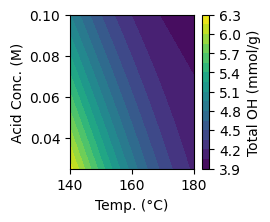

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Temp and Acid Conc.)
X = df[['Temp. (°C)', 'Acid Conc. (M)', 'Intercept']].values

# Specify the response variable (Total OH)
y = df['Total OH'].values

# Define a second-order polynomial model
def second_order_polynomial(x, a, b, c, d, e, f):
    return a + b*x[0] + c*x[1] + d*x[0]**2 + e*x[1]**2 + f*x[0]*x[1]

# Fit the second-order polynomial model
params, covariance = curve_fit(second_order_polynomial, X.T, y)

# Print the fitted parameters
print('Fitted Parameters:', params)

# Generate a grid of values for Temp and Acid Conc.
temp_values = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_values = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
temp_grid, acid_grid = np.meshgrid(temp_values, acid_values)
grid_values = np.vstack((temp_grid.flatten(), acid_grid.flatten(), np.ones_like(temp_grid.flatten())))

# Predict Total OH for the grid using the fitted parameters
predicted_total_oh = second_order_polynomial(grid_values, *params)

# Reshape the predicted values to match the grid shape
predicted_total_oh_grid = predicted_total_oh.reshape(temp_grid.shape)

# Create a contour plot
plt.figure(figsize=(2, 2))
contour = plt.contourf(temp_grid, acid_grid, predicted_total_oh_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Total OH (mmol/g)')
plt.xlabel('Temp. (°C)')
plt.ylabel('Acid Conc. (M)')
# plt.title('Second-Order Polynomial Contour Plot: Total OH vs Time and Acid Conc.')
plt.savefig('/content/drive/MyDrive/python/TvC.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


Fitted Parameters: [ 8.08413281e+00 -2.85775549e-01 -1.56538180e+01  6.71730770e-03
  4.92307808e+01  1.33318502e-02]


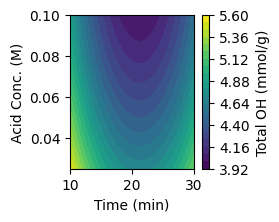

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Time and Acid Conc.)
X = df[['Time (min)', 'Acid Conc. (M)', 'Intercept']].values

# Specify the response variable (Total OH)
y = df['Total OH'].values

# Define a second-order polynomial model
def second_order_polynomial(x, a, b, c, d, e, f):
    return a + b*x[0] + c*x[1] + d*x[0]**2 + e*x[1]**2 + f*x[0]*x[1]

# Fit the second-order polynomial model
params, covariance = curve_fit(second_order_polynomial, X.T, y)

# Print the fitted parameters
print('Fitted Parameters:', params)

# Generate a grid of values for Time and Acid Conc.
time_values = np.linspace(df['Time (min)'].min(), df['Time (min)'].max(), 100)
acid_values = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
time_grid, acid_grid = np.meshgrid(time_values, acid_values)
grid_values = np.vstack((time_grid.flatten(), acid_grid.flatten(), np.ones_like(time_grid.flatten())))

# Predict Total OH for the grid using the fitted parameters
predicted_total_oh = second_order_polynomial(grid_values, *params)

# Reshape the predicted values to match the grid shape
predicted_total_oh_grid = predicted_total_oh.reshape(time_grid.shape)

# Create a contour plot
plt.figure(figsize=(2, 2))
contour = plt.contourf(time_grid, acid_grid, predicted_total_oh_grid, levels=20, cmap='viridis')
plt.colorbar(contour, label='Total OH (mmol/g)')
plt.xlabel('Time (min)', fontsize=10)
plt.ylabel('Acid Conc. (M)', fontsize=10)
# plt.title('Second-Order Polynomial Contour Plot: Total OH vs Time and Acid Conc.')
plt.savefig('/content/drive/MyDrive/python/contour_plot.png', format='png', dpi=600, bbox_inches='tight')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Time and Acid Conc.)
X = df[['Time (min)', 'Acid Conc. (M)', 'Intercept']].values

# Specify the response variable (Total OH)
y = df['Total OH'].values

# Define a second-order polynomial model
def second_order_polynomial(x, a, b, c, d, e, f):
    return a + b*x[0] + c*x[1] + d*x[0]**2 + e*x[1]**2 + f*x[0]*x[1]

# Fit the second-order polynomial model
params, covariance = curve_fit(second_order_polynomial, X.T, y)

# Print the fitted parameters
print('Fitted Parameters:', params)

# Print the equation
equation = f'Total OH = {params[0]:.2f} + {params[1]:.2f} * Time + {params[2]:.2f} * Acid Conc. + ' \
           f'{params[3]:.2f} * Time^2 + {params[4]:.2f} * Acid Conc.^2 + {params[5]:.2f} * Time * Acid Conc.'
print('Equation:', equation)
print(results.summary())


Fitted Parameters: [ 8.08413281e+00 -2.85775549e-01 -1.56538180e+01  6.71730770e-03
  4.92307808e+01  1.33318502e-02]
Equation: Total OH = 8.08 + -0.29 * Time + -15.65 * Acid Conc. + 0.01 * Time^2 + 49.23 * Acid Conc.^2 + 0.01 * Time * Acid Conc.
                            OLS Regression Results                            
Dep. Variable:               Total OH   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     5.177
Date:                Wed, 13 Dec 2023   Prob (F-statistic):             0.0239
Time:                        18:41:37   Log-Likelihood:                -13.536
No. Observations:                  15   AIC:                             33.07
Df Residuals:                      12   BIC:                             35.20
Df Model:                           2                                         
Covariance Type:            nonrobust     

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


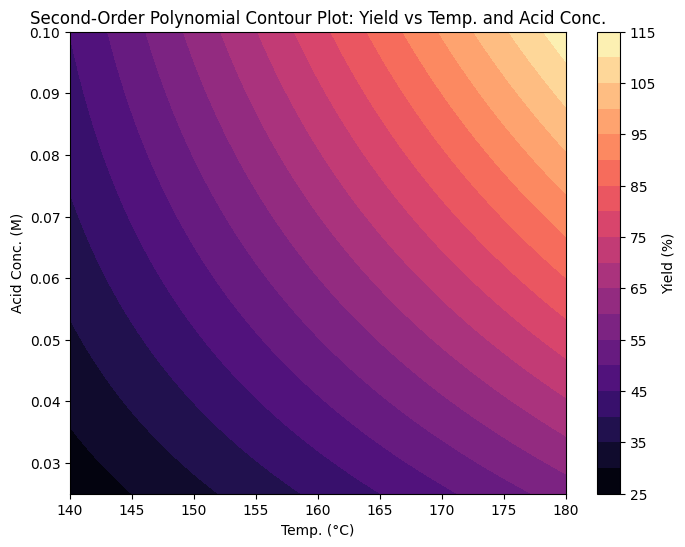

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Specify the path to your CSV file
csv_file_path = '/content/drive/MyDrive/python/rsm.csv'

# Use pandas to read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Add a constant term to the design matrix
df['Intercept'] = 1

# Specify the independent variables (Temp and Acid Conc.)
X = df[['Temp. (°C)', 'Acid Conc. (M)', 'Intercept']].values

# Specify the response variable (Yield)
y = df['Yield (%)'].values

# Define a second-order polynomial model
def second_order_polynomial(x, a, b, c, d, e, f):
    return a + b*x[0] + c*x[1] + d*x[0]**2 + e*x[1]**2 + f*x[0]*x[1]

# Fit the second-order polynomial model
params, covariance = curve_fit(second_order_polynomial, X.T, y)

# Generate a grid of values for Temp and Acid Conc.
temp_values = np.linspace(df['Temp. (°C)'].min(), df['Temp. (°C)'].max(), 100)
acid_values = np.linspace(df['Acid Conc. (M)'].min(), df['Acid Conc. (M)'].max(), 100)
temp_grid, acid_grid = np.meshgrid(temp_values, acid_values)
grid_values = np.vstack((temp_grid.flatten(), acid_grid.flatten(), np.ones_like(temp_grid.flatten())))

# Predict Yield for the grid using the fitted parameters
predicted_yield = second_order_polynomial(grid_values, *params)

# Reshape the predicted values to match the grid shape
predicted_yield_grid = predicted_yield.reshape(temp_grid.shape)

# Create a contour plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(temp_grid, acid_grid, predicted_yield_grid, levels=20, cmap='magma')
plt.colorbar(contour, label='Yield (%)')
plt.xlabel('Temp. (°C)')
plt.ylabel('Acid Conc. (M)')
plt.title('Second-Order Polynomial Contour Plot: Yield vs Temp. and Acid Conc.')
plt.show()
